<a href="https://colab.research.google.com/github/amansatyam18/amansatyam18/blob/main/Clustering_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING MODEL

In [1]:
#import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Downloading of dataset

df=pd.read_csv('clusters.csv')
df.head()



,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Use PCA to create a 2D version of the features for visualization

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Normalization of numeric features
scaled_features = MinMaxScaler().fit_transform(df)

#get two principal components
pca=PCA(n_components=2).fit(scaled_features)
features_2d=pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

Visualization of unclustered data points

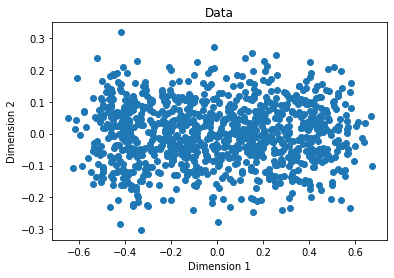

In [11]:
plt.scatter(features_2d[:,0],features_2d[:,1])

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Data")
plt.show()


Calculation of WCSS

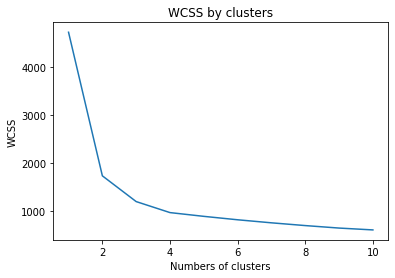

In [13]:
from sklearn.cluster import KMeans

#create 10 models with 1 to 10 clusters

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('WCSS by clusters')
plt.xlabel("Numbers of clusters")
plt.ylabel("WCSS")
plt.show()

Kmeans Clustering

In [16]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,init='k-means++',n_init=500,max_iter=1500)
km_cluster=km.fit_predict(df)
km_cluster

array([0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 2, 2, 3, 3, 3, 1, 2, 3, 3, 0, 3,
       0, 0, 3, 2, 1, 0, 2, 3, 2, 0, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 1, 2,
       1, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3,
       2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 0, 2, 3, 2, 1, 2, 3, 1, 2, 3,
       3, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 3, 3, 1,
       3, 2, 0, 0, 2, 1, 2, 1, 0, 2, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2, 2,
       2, 3, 2, 2, 3, 0, 3, 2, 0, 2, 2, 0, 1, 1, 3, 1, 3, 3, 1, 0, 0, 3,
       0, 2, 0, 3, 3, 3, 2, 0, 1, 1, 3, 2, 2, 0, 0, 1, 0, 2, 3, 1, 3, 2,
       2, 3, 3, 0, 3, 0, 2, 2, 3, 1, 0, 1, 1, 2, 2, 0, 2, 3, 1, 2, 3, 3,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 3, 1, 0, 1, 1, 2, 0, 1, 3, 3, 1, 0, 1,
       3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 3, 0, 2, 3, 0, 1, 1, 0, 1, 2, 1, 2,
       1, 3, 3, 2, 1, 0, 0, 3, 1, 3, 2, 2, 1, 1, 1, 0, 1, 0, 3, 1, 1, 3,
       0, 3, 2, 2, 2, 3, 1, 0, 3, 2, 0, 2, 1, 3, 3, 0, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 3, 3, 2, 0, 1,

Visualization of kmeans clusters

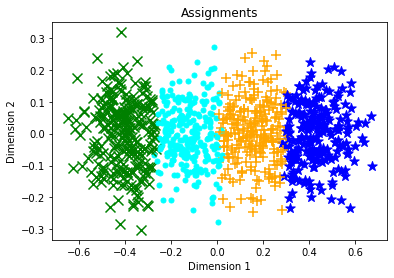

In [25]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_cluster)

Agglomerative Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering 

agg=AgglomerativeClustering(n_clusters=3)
agg_cluster=agg.fit_predict(df)
agg_cluster

array([1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0,

Visualize the Agglomerative clusters

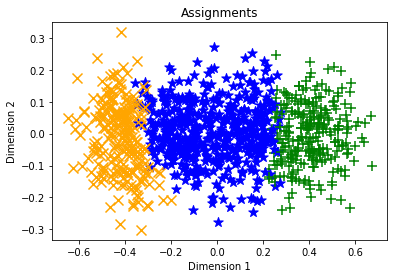

In [31]:
def plot_clusters(samples,clusters):
  mrk_dic={0:'*',1:'+',2:'x'}
  col_dic={0:'blue',1:'green',2:'orange'}
  colors=[col_dic[x] for x in clusters]
  markers=[mrk_dic[x] for x in clusters]

  for sample in range(len(clusters)):
    plt.scatter(samples[sample][0],samples[sample][1],color=colors[sample],marker=markers[sample],s=100)
  plt.xlabel("Dimension 1")
  plt.ylabel("Dimension 2")
  plt.title("Assignments")
  plt.show()

plot_clusters(features_2d,agg_cluster)